In [1]:
import os, glob, json, csv, subprocess, sys, re
from git import *
from subprocess import Popen, PIPE
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as ply
import plotly
from plotly.offline import plot, init_notebook_mode, iplot

%matplotlib inline

In [2]:
userhome = os.path.expanduser('~')

# Create directory list

In [3]:
dir_list = glob.glob(userhome + r'/historage-mining/historage/hbase/*')
print ("Found " + str(len(dir_list)) + " dirs")

Found 45 dirs


In [4]:
with open ("dir_list.txt", mode="wt", encoding="utf-8") as myfile:
    myfile.write('\n'.join(dir_list))
print ("File dir_list.txt has been created")

File dir_list.txt has been created


# Load directory list from file 

In [5]:
txt_file = open("dir_list.txt", "r")
dir_list = txt_file.read().split('\n')
print ("Found " + str(len(dir_list)) + " dirs")

Found 45 dirs


# Defining function to extract commit log

In [6]:
def execute_shell_command(cmd, work_dir):
    """Executes a shell command in a subprocess, waiting until it has completed.
 
    :param cmd: Command to execute.
    :param work_dir: Working directory path.
    """
    pipe = subprocess.Popen(cmd, shell=True, cwd=work_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, error) = pipe.communicate()
    return out, error
    pipe.wait()

Defining Repository

In [7]:
repository  = os.path.dirname(userhome + r'/historage-mining/historage/hbase/') 

List of git command

In [8]:
cmd = ['git log -w --unified=5 | wc -l', 'git log --unified=5 | wc -l', 
       'git log -U0 -w | wc -l', 'git log -U0 | wc -l', 
       'git log -w --patch | wc -l', 'git log --patch | wc -l']

In [9]:
result = []
for i in range(0,len(cmd)):
    sys.stdout.write("\rApplying git command = %i" % (i+1))
    sys.stdout.flush()
    result.append(int(str(execute_shell_command(cmd[i], repository)).replace("b",'').replace("'",'').
                      replace(' ','').replace("\\n,",'').replace("(",'').replace(")",'')))

print ("\n")
x = len(result)
y = x
for item in result:
    print (cmd[x-y] , "\t\t = " , item)
    y = y-1

Applying git command = 6

git log -w --unified=5 | wc -l 		 =  13621051
git log --unified=5 | wc -l 		 =  14151130
git log -U0 -w | wc -l 		 =  10426965
git log -U0 | wc -l 		 =  10811054
git log -w --patch | wc -l 		 =  12593795
git log --patch | wc -l 		 =  13095441


In [10]:
trace = go.Bar(
    x=cmd,
    y=result,
    name='number of line'
)

data = [trace]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# Extracting Commit ID

In [11]:
command = "git log --pretty='%H'"

In [12]:
com_ID = str(execute_shell_command(command, repository)).replace("b'",'').replace("'",'').replace('\\n',' ').replace("(",'').replace(")",'').replace(",",'').split(' ')

# Applying git diff commitID_1 commitID2 --shortstat

In [13]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 14893 out of 14893

56 files changed, 649 insertions(+), 377 deletions(-) ,
2 files changed, 11 insertions(+), 4 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
11 files changed, 171 insertions(+), 242 deletions(-) ,
2 files changed, 2 insertions(+), 4 deletions(-) ,
2 files changed, 85 insertions(+), 7 deletions(-) ,
5 files changed, 146 insertions(+), 35 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
5 files changed, 131 insertions(+), 5 deletions(-) ,
4 files changed, 39 insertions(+), 6 deletions(-) ,
1 file changed, 47 insertions(+), 10 deletions(-) ,
2 files changed, 78 insertions(+), 1 deletion(-) ,
13 files changed, 676 insertions(+), 576 deletions(-) ,
2 files changed, 73 insertions(+), 36 deletions(-) ,
2 files changed, 77 insertions(+), 27 deletions(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 

2 files changed, 14 insertions(+) ,
1 file changed, 3 insertions(+) ,
2 files changed, 10 insertions(+), 4 deletions(-) ,
2 files changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 74 insertions(+), 78 deletions(-) ,
9 files changed, 384 insertions(+), 347 deletions(-) ,
4 files changed, 126 insertions(+), 160 deletions(-) ,
2 files changed, 92 insertions(+), 58 deletions(-) ,
14 files changed, 55 insertions(+), 18 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
2 files changed, 29 insertions(+), 5 deletions(-) ,
8 files changed, 213 insertions(+), 117 deletions(-) ,
4 files changed, 357 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 73 insertions(+), 9 deletions(-) ,
6 files changed, 47 insertions(+), 34 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 66 insertions(+), 70 deletions(-) ,
1 file changed, 23 inser

5 files changed, 3 insertions(+), 137 deletions(-) ,
1 file changed, 26 insertions(+), 19 deletions(-) ,
168 files changed, 1226 insertions(+), 832 deletions(-) ,
2 files changed, 9 insertions(+), 17 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 4 deletions(-) ,
14 files changed, 520 insertions(+), 204 deletions(-) ,
5 files changed, 89 insertions(+), 79 deletions(-) ,
1 file changed, 9 insertions(+), 10 deletions(-) ,
2 files changed, 15 insertions(+), 10 deletions(-) ,
2 files changed, 124 insertions(+), 30 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 16 insertions(+), 3 deletions(-) ,
1 file changed, 9 insertions(+), 12 deletions(-) ,
4 files changed, 116 insertions(+), 31 deletions(-) ,
4 files changed, 4 insertions(+), 35 deletions(-) ,
52 files changed, 1290 insertions(+), 1265 deletions(-) ,
3 files changed, 159 insertions(+), 53 deletions(-) ,

1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 45 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 6 deletions(-) ,
1 file changed, 27 insertions(+) ,
2 files changed, 30 insertions(+), 5 deletions(-) ,
2 files changed, 29 insertions(+), 24 deletions(-) ,
2 files changed, 16 insertions(+), 27 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 54 insertions(+), 27 deletions(-) ,
2 files changed, 8 insertions(+), 2 deletions(-) ,
3 files changed, 6 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 69 insertions(+), 24 deletions(-) ,
4 files changed, 611 insertions(+) ,
1 file changed, 6 insertions(+) ,
4 files changed, 112 insertions(+), 1 deletion(-) ,
1 file changed, 44 insertions(+), 19 deletions(-) ,
5 files cha

179 files changed, 2672 insertions(+), 1987 deletions(-) ,
2 files changed, 88 insertions(+), 1 deletion(-) ,
3 files changed, 20 insertions(+), 3 deletions(-) ,
1 file changed, 1 deletion(-) ,
11 files changed, 483 insertions(+), 555 deletions(-) ,
1 file changed, 8 insertions(+), 3 deletions(-) ,
4 files changed, 128 insertions(+), 15 deletions(-) ,
1 file changed, 1 insertion(+) ,
3 files changed, 17 insertions(+), 49 deletions(-) ,
1 file changed, 20 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 82 insertions(+), 15 deletions(-) ,
11 files changed, 86 insertions(+), 66 deletions(-) ,
1 file changed, 10 insertions(+), 1 deletion(-) ,
16 files changed, 150 insertions(+), 117 deletions(-) ,
2 files changed, 8 insertions(+), 1 deletion(-) ,
7 files changed, 1606 insertions(+), 996 deletions(-) ,
2 files changed, 14 insertions(+), 12 deletions(-) ,
1 file changed, 2 insertions(+) ,
8 files changed, 39 insertions(+), 48 deletions(-) ,
5 files changed, 1

2 files changed, 54 insertions(+), 5 deletions(-) ,
2 files changed, 318 insertions(+) ,
1 file changed, 141 insertions(+), 227 deletions(-) ,
1 file changed, 9 insertions(+), 3 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 168 insertions(+), 2621 deletions(-) ,
10 files changed, 373 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
6 files changed, 2621 insertions(+), 168 deletions(-) ,
2 files changed, 116 insertions(+), 118 deletions(-) ,
2 files changed, 25 insertions(+), 5 deletions(-) ,
4 files changed, 40 insertions(+), 11 deletions(-) ,
6 files changed, 96 insertions(+), 20 deletions(-) ,
6 files changed, 122 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 212 insertions(+), 137 deletions(-) ,
5 files changed, 6 insertions(+), 80 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
4 files changed, 116 insertions(+), 14 deletions(-) ,
5 files changed, 

52 files changed, 324 insertions(+), 238 deletions(-) ,
1 file changed, 10 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
11 files changed, 28 insertions(+), 71 deletions(-) ,
11 files changed, 71 insertions(+), 28 deletions(-) ,
11 files changed, 28 insertions(+), 71 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
11 files changed, 311 insertions(+), 187 deletions(-) ,
6 files changed, 281 insertions(+), 114 deletions(-) ,
26 files changed, 1562 insertions(+), 1001 deletions(-) ,
1 file changed, 20 insertions(+), 1 deletion(-) ,
4 files changed, 4 insertions(+), 4 deletions(-) ,
1 file changed, 9 insertions(+), 3 deletions(-) ,
3 files changed, 73 insertions(+), 4 deletions(-) ,
11 files changed, 100 insertions(+), 21 deletions(-) ,
1 file changed, 13 insertions(+), 5 deletions(-) ,
10 files 

9 files changed, 5470 insertions(+), 1056 deletions(-) ,
2 files changed, 14 insertions(+), 2 deletions(-) ,
17 files changed, 193 insertions(+), 1158 deletions(-) ,
1 file changed, 8 insertions(+), 5 deletions(-) ,
17 files changed, 1158 insertions(+), 193 deletions(-) ,
2 files changed, 25 insertions(+), 2 deletions(-) ,
1 file changed, 8 insertions(+), 6 deletions(-) ,
1 file changed, 7 insertions(+), 5 deletions(-) ,
2 files changed, 23 insertions(+), 2 deletions(-) ,
1 file changed, 4 insertions(+) ,
132 files changed, 199 insertions(+), 17441 deletions(-) ,
635 files changed, 11559 insertions(+), 6002 deletions(-) ,
3 files changed, 90 insertions(+), 5 deletions(-) ,
721 files changed, 22855 insertions(+), 11631 deletions(-) ,
1 file changed, 14 insertions(+), 29 deletions(-) ,
1 file changed, 2 insertions(+), 28 deletions(-) ,
1 file changed, 8 insertions(+), 2 deletions(-) ,
14 files changed, 760 insertions(+), 790 deletions(-) ,
1 file changed, 44 insertions(+), 24 deletions(-

1 file changed, 11 deletions(-) ,
2 files changed, 12 insertions(+) ,
3 files changed, 75 insertions(+), 3 deletions(-) ,
2 files changed, 34 insertions(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 6 deletions(-) ,
1 file changed, 6 insertions(+), 2 deletions(-) ,
1 file changed, 20 insertions(+), 5 deletions(-) ,
1 file changed, 9 insertions(+), 7 deletions(-) ,
5 files changed, 149 insertions(+), 55 deletions(-) ,
5 files changed, 148 insertions(+), 4 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 4 deletions(-) ,
244 files changed, 11348 insertions(+), 18264 deletions(-) ,
233 files changed, 18113 insertions(+), 10577 deletions(-) ,
3 files changed, 20 insertions(+) ,
1 file changed, 25 insertions(+), 16 deletions(-) ,
2 files changed, 91 insertions(+), 7 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
6 files changed, 469 insertions(+) ,
1 file changed, 82 insertions(+), 65 deletions(-) ,
1

1 file changed, 68 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
3 files changed, 48 insertions(+), 8 deletions(-) ,
4 files changed, 10 insertions(+), 23 deletions(-) ,
1 file changed, 12 insertions(+), 29 deletions(-) ,
1 file changed, 12 deletions(-) ,
1 file changed, 2 insertions(+), 5 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 26 insertions(+), 21 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 14 insertions(+) ,
2 files changed, 53 insertions(+), 1 deletion(-) ,
5 files changed, 142 insertions(+), 32 deletions(-) ,
3 files changed, 66 insertions(+), 4 deletions(-) ,
1 file changed, 5 insertions(+), 1 deletion(-) ,
1 file changed, 13 insertions(+) ,
1 file changed, 12 insertions(+), 4 deletions(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
8 files changed, 345 insertions(+), 103 deletions(-) ,
1 file changed, 209 insert

5 files changed, 52 insertions(+), 11 deletions(-) ,
9 files changed, 1120 insertions(+), 395 deletions(-) ,
1 file changed, 51 insertions(+), 3 deletions(-) ,
1 file changed, 6 insertions(+), 8 deletions(-) ,
1 file changed, 7 deletions(-) ,
1 file changed, 2 insertions(+) ,
1 file changed, 5 insertions(+) ,
1 file changed, 16 insertions(+), 11 deletions(-) ,
1 file changed, 9 insertions(+) ,
2 files changed, 7 insertions(+), 2 deletions(-) ,
14 files changed, 167 insertions(+), 321 deletions(-) ,
1 file changed, 14 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 4 deletions(-) ,
1 file changed, 14 insertions(+), 2 deletions(-) ,
17 files changed, 689 insertions(+), 466 deletions(-) ,
1 file changed, 3 insertions(+) ,
1 file changed, 1 insertion(+), 3 deletions(-) ,
5 files changed, 8 insertions(+), 3 deletions(-) ,
6 files changed, 38 insertions(+), 8 deletions(-) ,
4 files changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
4

1 file changed, 9 insertions(+), 18 deletions(-) ,
6 files changed, 147 insertions(+), 26 deletions(-) ,
1 file changed, 6 insertions(+), 1 deletion(-) ,
1 file changed, 9 insertions(+) ,
2 files changed, 21 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
7 files changed, 55 insertions(+), 37 deletions(-) ,
1 file changed, 16 insertions(+), 2 deletions(-) ,
3 files changed, 134 insertions(+), 2 deletions(-) ,
1 file changed, 10 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 58 insertions(+) ,
2 files changed, 15 insertions(+), 12 deletions(-) ,
1 file changed, 11 insertions(+), 1 deletion(-) ,
1 file changed, 71 insertions(+), 29 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 4 deletions(-) ,
1 file changed, 8 insertions(+), 4 deletions(-) ,
3 files changed, 

5 files changed, 172 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 154 insertions(+), 25 deletions(-) ,
1 file changed, 41 insertions(+) ,
1 file changed, 14 insertions(+), 5 deletions(-) ,
2 files changed, 63 insertions(+), 13 deletions(-) ,
1 file changed, 2 insertions(+), 5 deletions(-) ,
19 files changed, 48 insertions(+), 48 deletions(-) ,
2 files changed, 47 insertions(+), 37 deletions(-) ,
1 file changed, 47 insertions(+), 47 deletions(-) ,
3 files changed, 215 insertions(+), 28 deletions(-) ,
4 files changed, 54 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 40 deletions(-) ,
2 files changed, 4 insertions(+), 4 deletions(-) ,
402 files changed, 21525 insertions(+), 8331 deletions(-) ,
8 files changed, 302 insertions(+), 32 deletions(-) ,
6 files changed, 36 insertions(+), 40 deletions(-) ,
3 files changed, 57 insertions(+), 8 deletions(-) ,
1 fi

2 files changed, 13 insertions(+), 4 deletions(-) ,
12 files changed, 441 insertions(+), 1188 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
12 files changed, 949 insertions(+), 490 deletions(-) ,
1 file changed, 36 insertions(+), 31 deletions(-) ,
2 files changed, 188 insertions(+), 11 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
11 files changed, 151 insertions(+), 29 deletions(-) ,
2 files changed, 20 insertions(+), 20 deletions(-) ,
1 file changed, 9 insertions(+), 4 deletions(-) ,
3 files changed, 6 insertions(+), 19 deletions(-) ,
1 file changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 3425 insertions(+) ,
14 files changed, 2354 insertions(+), 112 deletions(-) ,
7 files changed, 943 insertions(+), 311 deletions(-) ,
3 files changed, 115 insertions(+), 13 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
44 files changed, 87 insertions(+) ,
26 files changed, 428 insertions(+), 134 deletions(-) ,
8 files changed, 108 insertio

1 file changed, 2 insertions(+) ,
13 files changed, 0 insertions(+), 0 deletions(-) ,
29 files changed, 1799 insertions(+) ,
3 files changed, 34 insertions(+), 10 deletions(-) ,
6 files changed, 18 insertions(+), 2 deletions(-) ,
1 file changed, 22 insertions(+), 11 deletions(-) ,
1 file changed, 16 insertions(+), 25 deletions(-) ,
7 files changed, 14 insertions(+) ,
2 files changed, 11 insertions(+), 1 deletion(-) ,
4 files changed, 62 insertions(+), 39 deletions(-) ,
1 file changed, 96 insertions(+), 12 deletions(-) ,
1 file changed, 2 insertions(+), 5 deletions(-) ,
17 files changed, 272 insertions(+), 217 deletions(-) ,
8 files changed, 26 insertions(+), 21 deletions(-) ,
5 files changed, 156 insertions(+), 133 deletions(-) ,
37 files changed, 128 insertions(+), 19 deletions(-) ,
3 files changed, 141 insertions(+) ,
1 file changed, 6 insertions(+), 8 deletions(-) ,
(,
1 file changed, 0 insertions(+), 0 deletions(-) ,
2 files changed, 252 insertions(+) ,
250 files changed, 1251 inse

1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 29 insertions(+), 8 deletions(-) ,
1 file changed, 45 insertions(+), 2 deletions(-) ,
2 files changed, 21 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 71 insertions(+), 19 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 8 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
6 files changed, 34 insertions(+), 23 deletions(-) ,
5 files changed, 160 insertions(+), 80 deletions(-) ,
2 files changed, 8 insertions(+) ,
1 file changed, 7 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
5 files changed, 28 insertions(+), 5 deletions(-) ,
8 files changed, 23 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 13 insertions(+), 13 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 7 insertions(+

3 files changed, 40 insertions(+), 16 deletions(-) ,
1 file changed, 1 insertion(+) ,
5 files changed, 39 insertions(+), 9 deletions(-) ,
4 files changed, 36 insertions(+), 1 deletion(-) ,
3 files changed, 8 insertions(+), 30 deletions(-) ,
6 files changed, 290 insertions(+), 244 deletions(-) ,
2 files changed, 30 insertions(+), 11 deletions(-) ,
3 files changed, 5 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 11 deletions(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
3 files changed, 135 insertions(+) ,
5 files changed, 136 insertions(+), 6 deletions(-) ,
3 files changed, 123 insertions(+), 19 deletions(-) ,
2 files changed, 20 insertions(+), 20 deletions(-) ,
2 files changed, 20 insertions(+), 20 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
3 files changed, 1 insertion(+) ,
4 files changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 9 insertions(+), 6 deletions(-) ,
2 files changed, 14 insertions(+)

1 file changed, 1 insertion(+) ,
11 files changed, 254 insertions(+), 425 deletions(-) ,
21 files changed, 453 insertions(+), 595 deletions(-) ,
23 files changed, 1435 insertions(+), 711 deletions(-) ,
30 files changed, 2778 insertions(+), 1029 deletions(-) ,
55 files changed, 629 insertions(+), 318 deletions(-) ,
4 files changed, 169 insertions(+), 19 deletions(-) ,
23 files changed, 373 insertions(+), 332 deletions(-) ,
14 files changed, 2490 insertions(+), 1500 deletions(-) ,
5 files changed, 190 insertions(+), 228 deletions(-) ,
11 files changed, 553 insertions(+), 503 deletions(-) ,
14 files changed, 1346 insertions(+), 1074 deletions(-) ,
3 files changed, 140 insertions(+), 22 deletions(-) ,
6 files changed, 731 insertions(+) ,
8 files changed, 373 insertions(+), 78 deletions(-) ,
3 files changed, 56 insertions(+), 56 deletions(-) ,
13 files changed, 85 insertions(+), 88 deletions(-) ,
9 files changed, 794 insertions(+), 85 deletions(-) ,
3 files changed, 147 insertions(+), 4 del

In [14]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [15]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [16]:
with open('metrics1.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [17]:
data1 = pd.read_csv('metrics1.csv')
file_sum1 = data1['files changed'].sum()
ins_sum1 = data1['insertions(+)'].sum()
del_sum1 = data1['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum1)
print ("Sum of insertions(+) = %i" % ins_sum1)
print ("Sum of deletions(-)  = %i" % del_sum1)
saved_column1 = data1[header]
saved_column1.head()

Sum of files changed = 251329
Sum of insertions(+) = 10175878
Sum of deletions(-)  = 8996806


,files changed,insertions(+),deletions(-)
0,56,649.0,377.0
1,2,11.0,4.0
2,1,14.0,4.0
3,2,2.0,2.0
4,11,171.0,242.0


Text(0,0.5,'Quantity')

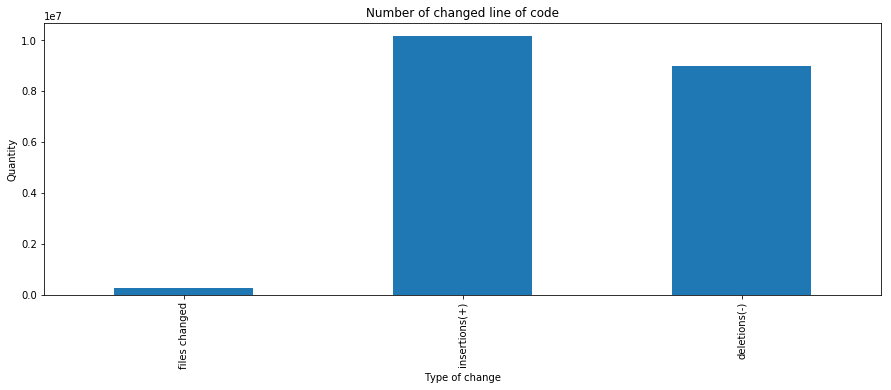

In [18]:
mygraph = data1.sum().plot(figsize=(15,5), kind='bar', title = 'Number of changed line of code')
mygraph.set_xlabel("Type of change")
mygraph.set_ylabel("Quantity")

# Applying git diff -w commitID_1 commitID2 --shortstat

In [19]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 14893 out of 14893

56 files changed, 643 insertions(+), 371 deletions(-) ,
2 files changed, 10 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
11 files changed, 160 insertions(+), 231 deletions(-) ,
2 files changed, 2 insertions(+), 4 deletions(-) ,
2 files changed, 85 insertions(+), 7 deletions(-) ,
5 files changed, 132 insertions(+), 21 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
5 files changed, 131 insertions(+), 5 deletions(-) ,
4 files changed, 39 insertions(+), 6 deletions(-) ,
1 file changed, 47 insertions(+), 10 deletions(-) ,
2 files changed, 78 insertions(+), 1 deletion(-) ,
13 files changed, 675 insertions(+), 575 deletions(-) ,
2 files changed, 67 insertions(+), 30 deletions(-) ,
2 files changed, 66 insertions(+), 16 deletions(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 

24 files changed, 1117 insertions(+), 179 deletions(-) ,
1 file changed, 3 insertions(+), 4 deletions(-) ,
20 files changed, 1082 insertions(+), 580 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
3 files changed, 101 insertions(+), 20 deletions(-) ,
1 file changed, 3 insertions(+) ,
2 files changed, 47 insertions(+) ,
62 files changed, 114 insertions(+), 121 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 14 insertions(+), 9 deletions(-) ,
4 files changed, 74 insertions(+), 7 deletions(-) ,
1 file changed, 63 insertions(+), 55 deletions(-) ,
1 file changed, 4 deletions(-) ,
17 files changed, 296 insertions(+), 224 deletions(-) ,
14 files changed, 87 insertions(+), 66 deletions(-) ,
1 file changed, 3 deletions(-) ,
2 files changed, 45 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 27 insertions(+), 2 deletions(-) ,
5 files changed, 8 insertions(+), 120 deletions(-) ,
5 files changed, 120 i

1 file changed, 26 insertions(+), 19 deletions(-) ,
168 files changed, 1126 insertions(+), 732 deletions(-) ,
2 files changed, 9 insertions(+), 17 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 4 deletions(-) ,
14 files changed, 518 insertions(+), 202 deletions(-) ,
5 files changed, 88 insertions(+), 78 deletions(-) ,
1 file changed, 9 insertions(+), 10 deletions(-) ,
2 files changed, 15 insertions(+), 10 deletions(-) ,
2 files changed, 122 insertions(+), 28 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 14 insertions(+), 1 deletion(-) ,
1 file changed, 9 insertions(+), 12 deletions(-) ,
4 files changed, 116 insertions(+), 31 deletions(-) ,
4 files changed, 4 insertions(+), 35 deletions(-) ,
52 files changed, 1205 insertions(+), 1180 deletions(-) ,
3 files changed, 157 insertions(+), 51 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
21 

9 files changed, 196 insertions(+), 1491 deletions(-) ,
1 file changed, 8 deletions(-) ,
1 file changed, 1 insertion(+), 11 deletions(-) ,
10 files changed, 163 insertions(+), 3 deletions(-) ,
3 files changed, 26 insertions(+), 6 deletions(-) ,
2 files changed, 35 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 3 insertions(+) ,
1 file changed, 6 insertions(+) ,
1 file changed, 6 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 41 insertions(+), 13 deletions(-) ,
10 files changed, 27 insertions(+), 17 deletions(-) ,
5 files changed, 94 insertions(+), 8 deletions(-) ,
1 file changed, 5 insertions(+), 10 deletions(-) ,
4 files changed, 122 insertions(+), 14 deletions(-) ,
4 files changed, 14 insertions(+), 122 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 25 insertions(+) ,
4 files changed, 122 insertions(+), 14 deletions(-) ,
1 file changed, 2 insertions

6 files changed, 240 insertions(+), 3 deletions(-) ,
10 files changed, 420 insertions(+), 42 deletions(-) ,
50 files changed, 5992 insertions(+), 982 deletions(-) ,
21 files changed, 1085 insertions(+), 30 deletions(-) ,
15 files changed, 2303 insertions(+), 7 deletions(-) ,
2 files changed, 36 insertions(+), 8 deletions(-) ,
9 files changed, 3032 insertions(+), 22 deletions(-) ,
3 files changed, 165 insertions(+), 3 deletions(-) ,
3 files changed, 20 insertions(+), 15 deletions(-) ,
3 files changed, 0 insertions(+), 0 deletions(-) ,
13 files changed, 4289 insertions(+), 332 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 50 insertions(+), 80 deletions(-) ,
1 file changed, 4 deletions(-) ,
3 files changed, 73 insertions(+), 34 deletions(-) ,
5 files changed, 206 insertions(+), 22 deletions(-) ,
1 file changed, 1 deletion(-) ,
2 files changed, 160 insertions(+), 28 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 insertions

1 file changed, 2 insertions(+) ,
1 file changed, 12 insertions(+), 6 deletions(-) ,
13 files changed, 607 insertions(+), 145 deletions(-) ,
1 file changed, 13 insertions(+), 3 deletions(-) ,
1 file changed, 36 insertions(+), 3 deletions(-) ,
3 files changed, 153 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
3 files changed, 52 insertions(+), 16 deletions(-) ,
11 files changed, 388 insertions(+), 87 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 30 insertions(+), 20 deletions(-) ,
5 files changed, 125 insertions(+), 11 deletions(-) ,
5 files changed, 110 insertions(+), 93 deletions(-) ,
3 files changed, 653 insertions(+), 62 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
23 files changed, 169 insertions(+), 103 deletions(-) ,
4 files changed, 11 insertions(+), 124 deletions(-) ,
1 file changed, 10 insertions(+), 84 deletions(-) ,
6 files changed, 430 insertions(+), 17 deletions(-) ,


6 files changed, 12 insertions(+), 8 deletions(-) ,
3 files changed, 557 insertions(+) ,
1 file changed, 25 deletions(-) ,
1 file changed, 3 insertions(+) ,
11 files changed, 323 insertions(+), 86 deletions(-) ,
1 file changed, 50 insertions(+) ,
1 file changed, 4 insertions(+), 4 deletions(-) ,
4 files changed, 85 insertions(+), 8 deletions(-) ,
9 files changed, 145 insertions(+), 48 deletions(-) ,
11 files changed, 21 insertions(+), 12 deletions(-) ,
4 files changed, 538 insertions(+), 2 deletions(-) ,
3 files changed, 53 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
4 files changed, 8 insertions(+), 8 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
3 files changed, 54 insertions(+), 24 deletions(-) ,
3 files changed, 96 insertions(+), 20 deletions(-) ,
1 file changed, 69 insertions(+), 66 deletions(-) ,
1 file changed, 66 insertions(+), 69 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 5 insertions

8 files changed, 224 insertions(+), 148 deletions(-) ,
13 files changed, 256 insertions(+), 35 deletions(-) ,
11 files changed, 107 insertions(+), 196 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 57 insertions(+), 14 deletions(-) ,
49 files changed, 1242 insertions(+), 1060 deletions(-) ,
49 files changed, 1060 insertions(+), 1242 deletions(-) ,
5 files changed, 8 insertions(+), 8 deletions(-) ,
12 files changed, 45 insertions(+), 19 deletions(-) ,
2 files changed, 27 insertions(+), 1 deletion(-) ,
17 files changed, 114 insertions(+), 44 deletions(-) ,
1 file changed, 8 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 8 insertions(+) ,
1 file changed, 3 insertions(+) ,
(,
10 files changed, 327 insertions(+), 35 deletions(-) ,
3 files changed, 40 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+) ,
3 files changed, 55 insertions(+) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
10 files changed, 7 inser

2 files changed, 40 insertions(+), 4 deletions(-) ,
2 files changed, 21 insertions(+), 23 deletions(-) ,
16 files changed, 713 insertions(+), 56 deletions(-) ,
2 files changed, 19 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+), 1 deletion(-) ,
1 file changed, 8 insertions(+) ,
1 file changed, 1 insertion(+) ,
33 files changed, 2303 insertions(+), 470 deletions(-) ,
40 files changed, 861 insertions(+), 320 deletions(-) ,
2 files changed, 34 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
32 files changed, 3792 insertions(+), 2173 deletions(-) ,
(,
2 files changed, 6 insertions(+), 2 deletions(-) ,
16 files changed, 1267 insertions(+), 600 deletions(-) ,
1 file changed, 9 insertions(+), 2 deletions(-) ,
4 files changed, 15 insertions(+), 4 deletions(-) ,
3 files changed, 40 insertions(+), 8 deletions(-) ,
1 file changed, 6 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 23 insertions(+), 4

3 files changed, 59 insertions(+), 6 deletions(-) ,
1 file changed, 8 insertions(+) ,
2 files changed, 2 insertions(+), 87 deletions(-) ,
18 files changed, 1820 insertions(+), 261 deletions(-) ,
2 files changed, 87 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+) ,
2 files changed, 28 insertions(+), 23 deletions(-) ,
3 files changed, 20 insertions(+), 7 deletions(-) ,
1 file changed, 3 insertions(+) ,
1 file changed, 20 insertions(+), 1 deletion(-) ,
3 files changed, 63 insertions(+), 50 deletions(-) ,
5 files changed, 20 insertions(+), 9 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+) ,
3 files changed, 43 insertions(+), 15 deletions(-) ,
3 files changed, 37 insertions(+), 26 deletions(-) ,
2 files changed, 81 insertions(+), 16 deletions(-) ,
4 files changed, 32 insertions(+), 5 deletions(-) ,
5 files changed, 737 insertions(+), 1 deletion(-) ,
2 files changed, 27 insertions(+), 51 deletions(-) ,
2 files changed, 2 inserti

1 file changed, 3 insertions(+), 1 deletion(-) ,
3 files changed, 10 insertions(+), 3 deletions(-) ,
1 file changed, 18 deletions(-) ,
1 file changed, 18 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 3 insertions(+) ,
2 files changed, 15 insertions(+), 9 deletions(-) ,
17 files changed, 5671 insertions(+), 583 deletions(-) ,
2 files changed, 108 insertions(+), 68 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
9 files changed, 17 insertions(+), 12 deletions(-) ,
6 files changed, 168 insertions(+), 25 deletions(-) ,
6 files changed, 255 insertions(+), 63 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 18 insertions(+), 11 deletions(-) ,
4 files changed, 218 insertions(+), 51 deletions(-) ,
4 files changed, 106 insertions(+), 482 deletions(-) ,
7 files changed, 33 insertions(+), 33 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 48 insertions(+), 2 deletions(-) ,
1 file chang

1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 430 insertions(+), 2 deletions(-) ,
3 files changed, 44 insertions(+), 2 deletions(-) ,
2 files changed, 216 insertions(+), 1 deletion(-) ,
2 files changed, 10 insertions(+), 10 deletions(-) ,
2 files changed, 8 insertions(+) ,
3 files changed, 91 insertions(+), 24 deletions(-) ,
4 files changed, 32 insertions(+), 7 deletions(-) ,
3 files changed, 30 insertions(+), 12 deletions(-) ,
15 files changed, 114 insertions(+), 222 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
34 files changed, 1369 insertions(+), 1867 deletions(-) ,
34 files changed, 1878 insertions(+), 1380 deletions(-) ,
34 files changed, 1369 insertions(+), 1867 deletions(-) ,
1 file changed, 8 insertions(+) ,
1 file changed, 33 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
30 files changed, 203 insertions(+), 1094 deletions(-) ,
1 file changed, 77 insertions(+), 13 deletions(-) ,
1 file changed, 10 deletion

1 file changed, 1 insertion(+) ,
2 files changed, 112 insertions(+), 2 deletions(-) ,
1 file changed, 37 insertions(+), 25 deletions(-) ,
11 files changed, 29 insertions(+), 19 deletions(-) ,
8 files changed, 116 insertions(+), 77 deletions(-) ,
1 file changed, 2 insertions(+) ,
3 files changed, 19 insertions(+), 4 deletions(-) ,
2 files changed, 17 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 3 insertions(+), 5 deletions(-) ,
2388 files changed, 98479 insertions(+), 52870 deletions(-) ,
4 files changed, 143 deletions(-) ,
5 files changed, 49 insertions(+), 8 deletions(-) ,
2391 files changed, 52938 insertions(+), 98436 deletions(-) ,
12 files changed, 156 insertions(+), 86 deletions(-) ,
3 files changed, 325 insertions(+) ,
2 files changed, 425 insertions(+), 270 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
14 files changed, 93 insertions(+), 78 deletions(-) ,
1 file changed, 1 ins

1 file changed, 5 insertions(+), 5 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 24 insertions(+), 5 deletions(-) ,
1 file changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
1 file changed, 33 insertions(+), 2 deletions(-) ,
10 files changed, 41 insertions(+), 28 deletions(-) ,
1 file changed, 5 insertions(+), 4 deletions(-) ,
2 files changed, 7 insertions(+), 7 deletions(-) ,
1 file changed, 159 insertions(+), 150 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
2 files changed, 22 insertions(+), 10 deletions(-) ,
3 files changed, 24 insertions(+), 3 deletions(-) ,
6 files changed, 653 insertions(+), 41 deletions(-) ,
1 file changed, 11 insertions(+), 4 deletions(-) ,
1 file changed, 5 insertions(+), 4 deletions(-) ,
1 file changed, 48 insertions(+), 5 deletions(-) ,
4 files changed, 0 insertions(+),

1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 25 insertions(+), 3 deletions(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
9 files changed, 27 insertions(+), 34 deletions(-) ,
1 file changed, 5 insertions(+), 5 deletions(-) ,
1 file changed, 17 insertions(+) ,
1 file changed, 8 insertions(+), 7 deletions(-) ,
6 files changed, 228 insertions(+), 26 deletions(-) ,
23 files changed, 196 insertions(+), 125 deletions(-) ,
4 files changed, 7 insertions(+), 10 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 77 insertions(+), 3 deletions(-) ,
52 files changed, 297 insertions(+), 236 deletions(-) ,
2 files changed, 4 insertions(+), 10 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
1 file changed, 4 insertions(+), 7 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 30 insertions(+), 12 deletions(-) ,
6 files changed, 171 insertions(+), 37 delet

1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+) ,
16 files changed, 183 insertions(+), 76 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 70 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 10 insertions(+), 8 deletions(-) ,
2 files changed, 59 insertions(+), 12 deletions(-) ,
1 file changed, 1 insertion(+) ,
61 files changed, 63 insertions(+), 4407 deletions(-) ,
1 file changed, 10 insertions(+), 7 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
2 files changed, 24 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 2 deletions(-) ,
3 files changed, 7 insertions(+), 5 deletions(-) ,
1 file changed, 1 insertion(+), 1 de

1 file changed, 46 insertions(+), 2 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 11 insertions(+) ,
2 files changed, 71 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 2 insertions(+), 106 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
9 files changed, 75 insertions(+), 25 deletions(-) ,
1 file changed, 4 insertions(+) ,
8 files changed, 81 insertions(+), 50 deletions(-) ,
4 files changed, 384 insertions(+), 388 deletions(-) ,
7 files changed, 26 insertions(+), 2 deletions(-) ,
5 files changed, 92 insertions(+), 8 deletions(-) ,
2 files changed, 99 insertions(+), 4 deletions(-) ,
6 files changed, 2 insertions(+), 293 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 19 insertions(+), 4 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 16 deletions(-) ,
1 file changed, 42 insertions(+), 1 deletion(-) ,
1 file 

1 file changed, 30 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 30 deletions(-) ,
1 file changed, 30 insertions(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
2 files changed, 11 insertions(+), 10 deletions(-) ,
1 file changed, 25 insertions(+), 17 deletions(-) ,
5 files changed, 354 insertions(+), 14 deletions(-) ,
4 files changed, 18 insertions(+), 16 deletions(-) ,
2 files changed, 29 insertions(+), 1 deletion(-) ,
2 files changed, 47 insertions(+) ,
4 files changed, 27 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
6 files changed, 41 insertions(+), 25 deletions(-) ,
1 file changed, 6 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 20 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 deletion(-) ,
1 file changed, 8 insertions(+), 2 deletions(-) ,
2

2 files changed, 54 insertions(+) ,
4 files changed, 101 insertions(+), 29 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 15 insertions(+), 6 deletions(-) ,
2 files changed, 40 insertions(+), 9 deletions(-) ,
1 file changed, 50 insertions(+), 5 deletions(-) ,
1 file changed, 14 insertions(+) ,
11 files changed, 276 insertions(+), 37 deletions(-) ,
13 files changed, 125 insertions(+), 35 deletions(-) ,
2 files changed, 7 insertions(+), 7 deletions(-) ,
7 files changed, 165 insertions(+), 3 deletions(-) ,
2 files changed, 172 insertions(+) ,
59 files changed, 6522 insertions(+), 3754 deletions(-) ,
4 files changed, 137 insertions(+), 2 deletions(-) ,
4 files changed, 16 insertions(+), 64 deletions(-) ,
2 files changed, 7 insertions(+), 2 deletions(-) ,
6 files changed, 111 insertions(+), 11 deletions(-) ,
14 files changed, 204 insertions(+), 132 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 64 insertions(+), 16 deleti

1 file changed, 2 insertions(+) ,
1 file changed, 19 insertions(+), 17 deletions(-) ,
1 file changed, 166 deletions(-) ,
54 files changed, 2495 insertions(+), 2495 deletions(-) ,
1 file changed, 1 deletion(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 39 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
4 files changed, 57 insertions(+), 28 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
3 files changed, 55 insertions(+), 45 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 12 insertions(+), 4 deletions(-) ,
3 files changed, 95 insertions(+), 2 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 5 deletions(-) ,
1 file changed, 4 insertions(+), 5

6 files changed, 3065 insertions(+), 89 deletions(-) ,
1 file changed, 1 insertion(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 8 insertions(+), 8 deletions(-) ,
13 files changed, 320 insertions(+), 47 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
12 files changed, 752 insertions(+), 110 deletions(-) ,
4 files changed, 37 insertions(+), 4 deletions(-) ,
2 files changed, 14 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 74 insertions(+), 37 deletions(-) ,
2 files changed, 60 insertions(+), 12 deletions(-) ,
1 file changed, 5 insertions(+) ,
3 files changed, 42 insertions(+), 164 deletions(-) ,
9 files changed, 41187 insertions(+), 1 deletion(-) ,
2 files changed, 45 insertions(+), 3 deletions(-) ,
1 file changed, 564 deletions(-) ,
7 files changed, 144 insertions(+), 33 deletions(-) ,
1 file changed, 3 insertions(+), 4 deletions(

5 files changed, 222 insertions(+), 48 deletions(-) ,
2 files changed, 5 insertions(+), 8 deletions(-) ,
4 files changed, 543 insertions(+) ,
2 files changed, 40 insertions(+), 4 deletions(-) ,
3 files changed, 36 insertions(+), 2 deletions(-) ,
4 files changed, 166 insertions(+), 60 deletions(-) ,
16 files changed, 551 insertions(+), 48 deletions(-) ,
8 files changed, 373 insertions(+), 627 deletions(-) ,
3 files changed, 327 insertions(+) ,
3 files changed, 15 insertions(+), 171 deletions(-) ,
2 files changed, 9 insertions(+), 3 deletions(-) ,
3 files changed, 203 insertions(+), 9 deletions(-) ,
2 files changed, 15 insertions(+), 4 deletions(-) ,
8 files changed, 148 insertions(+), 47 deletions(-) ,
1 file changed, 295 insertions(+) ,
2 files changed, 109 insertions(+), 57 deletions(-) ,
5 files changed, 122 insertions(+), 70 deletions(-) ,
3 files changed, 10 insertions(+), 1 deletion(-) ,
19 files changed, 554 insertions(+), 82 deletions(-) ,
11 files changed, 462 insertions(+), 13

14 files changed, 725 insertions(+), 250 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
2 files changed, 10 insertions(+), 11 deletions(-) ,
16 files changed, 714 insertions(+), 68 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 10 insertions(+), 5 deletions(-) ,
30 files changed, 745 insertions(+), 171 deletions(-) ,
3 files changed, 7 insertions(+), 2 deletions(-) ,
1 file changed, 34 insertions(+), 2 deletions(-) ,
2 files changed, 11 insertions(+), 2 deletions(-) ,
2 files changed, 6 insertions(+), 2 deletions(-) ,
2 files changed, 4 insertions(+), 2 deletions(-) ,
2 files changed, 6 insertions(+), 5 deletions(-) ,
5 files changed, 50 insertions(+), 50 deletions(-) ,
2 files changed, 19 insertions(+) ,
4 files changed, 10 insertions(+), 18 deletions(-) ,
7 files changed, 231 insertions(+), 171 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 9 insertions(+), 6 deletions(-) ,
2 files changed, 26 insert

1 file changed, 1 insertion(+), 3 deletions(-) ,
3 files changed, 31 insertions(+), 15 deletions(-) ,
7 files changed, 69 insertions(+), 63 deletions(-) ,
2 files changed, 4 insertions(+), 17 deletions(-) ,
13 files changed, 97 insertions(+), 88 deletions(-) ,
2 files changed, 91 insertions(+), 61 deletions(-) ,
3 files changed, 33 insertions(+), 27 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+), 43 deletions(-) ,
8 files changed, 293 insertions(+), 31 deletions(-) ,
1 file changed, 81 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 46 insertions(+), 6 deletions(-) ,
2 files changed, 16 insertions(+), 22 deletions(-) ,
2 files changed, 185 insertions(+) ,
21 files changed, 204 insertions(+), 2395 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
5 files changed, 94 insertions(+), 125 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
5 files changed, 326 insertions(+), 16

1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
22 files changed, 2816 insertions(+) ,
4 files changed, 19 insertions(+), 17 deletions(-) ,
2 files changed, 83 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+) ,
3 files changed, 12 insertions(+), 2 deletions(-) ,
2 files changed, 3 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 4 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+) ,
2 files changed, 1 insertion(+), 37 deletions(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 10 insertions(+), 11 deletions(-) ,
5 files changed, 47 insertions(+), 7 deletions(-) ,
2 files changed, 4 insertions(+) ,
4 files changed, 8 insertions(+), 6 deletions(-) ,
2 files changed, 14 insertions(+), 5 deletions(-) ,
6 files changed, 94 insertions(+), 14 deletions(-) ,
48 files changed, 631 in

2 files changed, 8 insertions(+), 1 deletion(-) ,
6 files changed, 56 insertions(+), 185 deletions(-) ,
14 files changed, 1055 insertions(+), 706 deletions(-) ,
2 files changed, 13 insertions(+), 12 deletions(-) ,
2 files changed, 6 insertions(+) ,
3 files changed, 4 insertions(+), 228 deletions(-) ,
3 files changed, 65 insertions(+), 5 deletions(-) ,
4 files changed, 125 insertions(+), 150 deletions(-) ,
2 files changed, 0 insertions(+), 0 deletions(-) ,
3 files changed, 1 insertion(+) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 18 insertions(+), 7 deletions(-) ,
3 files changed, 18 insertions(+), 162 deletions(-) ,
4 files changed, 24 insertions(+), 51 deletions(-) ,
2 files changed, 6 insertions(+) ,
33 files changed, 40 insertions(+), 33 deletions(-) ,
2 files changed, 7 insertions(+) ,
3 files changed, 13 insertions(+), 2 deletions(-) ,
17 files changed, 101 insertions(+), 14 deletions(-) ,
11 files changed, 396 insertions(+), 20 deletions(-) ,
4 files chan

4 files changed, 243 insertions(+), 15 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 34 insertions(+), 28 deletions(-) ,
3 files changed, 23 insertions(+) ,
24 files changed, 2275 insertions(+), 1753 deletions(-) ,
5 files changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+) ,
5 files changed, 23 insertions(+), 10 deletions(-) ,
2 files changed, 2 insertions(+), 5 deletions(-) ,
77 files changed, 4357 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
29 files changed, 99 insertions(+), 66 deletions(-) ,
2 files changed, 9 insertions(+), 9 deletions(-) ,
17 files changed, 45 insertions(+), 32 deletions(-) ,
3 files changed, 39 insertions(+), 3 deletions(-) ,
5 files changed, 2 insertions(+) ,
8 files changed, 10 insertions(+), 155 deletions(-) ,
4 files changed, 15 insertions(+), 21 deletions(-) ,
3 files changed, 48 insertions(+), 5 deletions(-) ,
2 files changed, 32 insertions(+), 29 deletions(-) ,
8 files changed,

In [20]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [21]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [22]:
with open('metrics2.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [23]:
data2 = pd.read_csv('metrics2.csv')
file_sum2 = data2['files changed'].sum()
ins_sum2 = data2['insertions(+)'].sum()
del_sum2 = data2['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum2)
print ("Sum of insertions(+) = %i" % ins_sum2)
print ("Sum of deletions(-)  = %i" % del_sum2)
saved_column2 = data2[header]
saved_column2.head()

Sum of files changed = 251329
Sum of insertions(+) = 9856798
Sum of deletions(-)  = 8677726


,files changed,insertions(+),deletions(-)
0,56,643.0,371.0
1,2,10.0,3.0
2,1,14.0,4.0
3,2,2.0,2.0
4,11,160.0,231.0


Text(0,0.5,'Quantity')

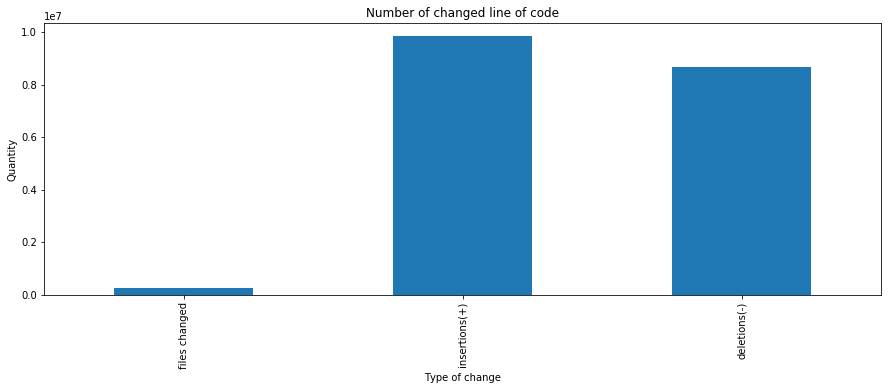

In [24]:
mygraph = data2.sum().plot(figsize=(15,5), kind='bar', title = 'Number of changed line of code')
mygraph.set_xlabel("Type of change")
mygraph.set_ylabel("Quantity")

In [25]:
data = [data1, data2]
table_sum = []
for i in range(0, len(data)):
    summ = 'command %i' % (i+1), data[i]['files changed'].sum(), data[i]['insertions(+)'].sum(), data[i]['deletions(-)'].sum()
    table_sum.append(summ)

for item in table_sum:
    print (item)

('command 1', 251329, 10175878.0, 8996806.0)
('command 2', 251329, 9856798.0, 8677726.0)


In [26]:
df = pd.DataFrame(table_sum, columns = ['command', 'files changed', 'insertions', 'deletions'])
df.to_csv('metrics_sum.csv')

In [27]:
trace1 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum1, ins_sum1, del_sum1],
    name='git diff commit1 commit2 --shortstat'
)
trace2 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum2, ins_sum2, del_sum2],
    name='git diff -w commit1 commit2 --shortstat'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# git diff -w --diff-algorithm=myers commit1 commit2 --shortstat

In [28]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=myers " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 14893 out of 14893

56 files changed, 643 insertions(+), 371 deletions(-) ,
2 files changed, 10 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
11 files changed, 160 insertions(+), 231 deletions(-) ,
2 files changed, 2 insertions(+), 4 deletions(-) ,
2 files changed, 85 insertions(+), 7 deletions(-) ,
5 files changed, 132 insertions(+), 21 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
5 files changed, 131 insertions(+), 5 deletions(-) ,
4 files changed, 39 insertions(+), 6 deletions(-) ,
1 file changed, 47 insertions(+), 10 deletions(-) ,
2 files changed, 78 insertions(+), 1 deletion(-) ,
13 files changed, 675 insertions(+), 575 deletions(-) ,
2 files changed, 67 insertions(+), 30 deletions(-) ,
2 files changed, 66 insertions(+), 16 deletions(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 

1 file changed, 6 insertions(+), 4 deletions(-) ,
14 files changed, 518 insertions(+), 202 deletions(-) ,
5 files changed, 88 insertions(+), 78 deletions(-) ,
1 file changed, 9 insertions(+), 10 deletions(-) ,
2 files changed, 15 insertions(+), 10 deletions(-) ,
2 files changed, 122 insertions(+), 28 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 14 insertions(+), 1 deletion(-) ,
1 file changed, 9 insertions(+), 12 deletions(-) ,
4 files changed, 116 insertions(+), 31 deletions(-) ,
4 files changed, 4 insertions(+), 35 deletions(-) ,
52 files changed, 1205 insertions(+), 1180 deletions(-) ,
3 files changed, 157 insertions(+), 51 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
21 files changed, 820 insertions(+), 301 deletions(-) ,
1 file changed, 7 insertions(+), 4 deletions(-) ,
3 files changed, 30 insertions(+), 123 deletions(-) ,
5 files changed, 10 insertions(+), 70 deletions(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 

4 files changed, 207 insertions(+) ,
1 file changed, 5 deletions(-) ,
12 files changed, 94 insertions(+), 65 deletions(-) ,
25 files changed, 67 insertions(+), 305 deletions(-) ,
8 files changed, 71 insertions(+), 4 deletions(-) ,
2 files changed, 14 insertions(+), 4 deletions(-) ,
10 files changed, 453 insertions(+), 62 deletions(-) ,
2 files changed, 36 insertions(+) ,
6 files changed, 93 insertions(+), 7 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
12 files changed, 55 insertions(+), 90 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
12 files changed, 90 insertions(+), 55 deletions(-) ,
8 files changed, 216 insertions(+), 17 deletions(-) ,
6 files changed, 293 insertions(+), 22 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
9 files changed, 387 insertions(+), 219 deletions(-) ,
5 files changed, 128 insertions(+), 26 deletions(-) ,
1 file ch

1 file changed, 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
30 files changed, 250 insertions(+), 629 deletions(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 361 deletions(-) ,
2 files changed, 34 insertions(+) ,
1 file changed, 1 deletion(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
48 files changed, 86 insertions(+), 100 deletions(-) ,
2 files changed, 12 insertions(+), 2 deletions(-) ,
17 files changed, 526 insertions(+), 198 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
82 files changed, 21585 insertions(+), 86 deletions(-) ,
1 file changed, 37 insertions(+) ,
1 file changed, 6 insertions(+) ,
4 files changed, 5 insertions(+), 549 deletions(-) ,
3 files changed, 20 inser

1 file changed, 11 insertions(+), 3 deletions(-) ,
3 files changed, 367 insertions(+) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
11 files changed, 73 insertions(+), 1 deletion(-) ,
1 file changed, 11 insertions(+), 2 deletions(-) ,
2 files changed, 64 insertions(+), 37 deletions(-) ,
1 file changed, 20 insertions(+), 20 deletions(-) ,
3 files changed, 100 insertions(+), 47 deletions(-) ,
2 files changed, 55 insertions(+), 1 deletion(-) ,
2 files changed, 1 insertion(+), 55 deletions(-) ,
2 files changed, 55 insertions(+), 1 deletion(-) ,
18 files changed, 144 insertions(+), 157 deletions(-) ,
6 files changed, 417 insertions(+), 59 deletions(-) ,
2 files changed, 98 insertions(+), 5 deletions(-) ,
1 file changed, 104 deletions(-) ,
4 files changed, 22 insertions(+), 8 deletions(-) ,
2 files changed, 81 insertions(+), 47 deletions(-) ,
1 file changed, 32 insertions(+) ,
3 files changed, 891 insertions(+), 28 deletions(-) ,
8 files changed, 733 insertions(+) ,
3 files changed, 9 

23 files changed, 597 insertions(+), 1364 deletions(-) ,
10 files changed, 42 insertions(+), 350 deletions(-) ,
1 file changed, 17 deletions(-) ,
23 files changed, 1364 insertions(+), 597 deletions(-) ,
2 files changed, 53 insertions(+), 6 deletions(-) ,
1 file changed, 237 deletions(-) ,
6 files changed, 47 insertions(+), 2 deletions(-) ,
3 files changed, 96 insertions(+), 46 deletions(-) ,
23 files changed, 597 insertions(+), 1364 deletions(-) ,
1 file changed, 17 insertions(+) ,
1 file changed, 32 insertions(+), 1 deletion(-) ,
10 files changed, 350 insertions(+), 42 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
9 files changed, 128 insertions(+), 1 deletion(-) ,
21 files changed, 397 insertions(+), 84 deletions(-) ,
8 files changed, 146 insertions(+), 51 deletions(-) ,
1 file changed, 69 insertions(+) ,
5 files changed, 78 insertions(+), 14 deletions(-) ,
1 file changed, 11 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file chan

1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 169 insertions(+), 71 deletions(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 7 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 72 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 194 insertions(+), 2 deletions(-) ,
13 files changed, 114 insertions(+), 35 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 3 insertions(+) ,
3 files changed, 17 insertions(+), 10 deletions(-) ,
2 files changed, 56 insertions(+), 2 deletions(-) ,
23 files changed, 4 insertions(+), 58 deletions(-) ,
1 file changed, 754 insertions(+), 145 deletions(-) ,
1 file changed, 22 insertions(+), 31 deletions(-) ,
1 file changed, 19 insertions(+), 17 deletions(-) ,
1 file changed, 69 deletions(-) ,
18 files changed, 132 insertions(+), 98 deletions(-) ,
1 file changed, 481 deletions(-) ,
1 file changed, 324 insertions(+) ,
2 files changed

3 files changed, 25 insertions(+), 24 deletions(-) ,
4 files changed, 38 insertions(+), 19 deletions(-) ,
1 file changed, 39 insertions(+), 42 deletions(-) ,
1 file changed, 42 insertions(+), 39 deletions(-) ,
18 files changed, 198 insertions(+), 90 deletions(-) ,
18 files changed, 90 insertions(+), 198 deletions(-) ,
1 file changed, 49 insertions(+), 20 deletions(-) ,
3 files changed, 47 insertions(+), 7 deletions(-) ,
13 files changed, 40 insertions(+), 29 deletions(-) ,
13 files changed, 29 insertions(+), 40 deletions(-) ,
18 files changed, 198 insertions(+), 90 deletions(-) ,
13 files changed, 40 insertions(+), 29 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 3 insertions(+) ,
5 files changed, 209 insertions(+) ,
1 file changed, 11 insertions(+), 10 deletions(-) ,
1 file changed, 100 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 15 deletions(-) ,
3 files changed, 58 insertions(+), 11 deletions(-) ,
1 file changed,

1 file changed, 4 insertions(+), 1 deletion(-) ,
8 files changed, 176 insertions(+), 8 deletions(-) ,
4 files changed, 127 insertions(+), 41 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
22 files changed, 2743 insertions(+), 1616 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 45 deletions(-) ,
2 files changed, 45 insertions(+) ,
2 files changed, 9 insertions(+) ,
1 file changed, 8 insertions(+) ,
11 files changed, 383 insertions(+), 25 deletions(-) ,
1 file changed, 81 insertions(+), 53 deletions(-) ,
1 file changed, 18 insertions(+), 5 deletions(-) ,
29 files changed, 493 insertions(+), 875 deletions(-) ,
1 file changed, 9 insertions(+) ,
1 file changed, 23 insertions(+) ,
427 files changed, 19807 insertions(+), 21277 deletions(-) ,
427 files changed, 21195 insertions(+), 19679 deletions(-) ,
427 files changed, 19758 insertions(+), 21259 deletions(-) ,
425 files changed, 21007 insertions(+), 19652 delet

6 files changed, 422 insertions(+), 268 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 17 insertions(+), 10 deletions(-) ,
1 file changed, 60 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 4 deletions(-) ,
11 files changed, 119 insertions(+), 104 deletions(-) ,
4 files changed, 30 insertions(+), 26 deletions(-) ,
1 file changed, 6 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 37 insertions(+) ,
4 files changed, 69 insertions(+) ,
2 files changed, 30 insertions(+), 19 deletions(-) ,
6 files changed, 77 insertions(+), 6 deletions(-) ,
20 files changed, 1002 insertions(+), 356 deletions(-) ,
4 files changed, 130 insertions(+), 37 deletions(-) ,
29 files changed, 2100 insertions(+), 1798 deletions(-) ,
8 files changed, 1986 deletions(-) ,
21 files changed, 1798 insertions(+), 114 deletions(-) ,
8 files chan

4 files changed, 2119 insertions(+) ,
17 files changed, 634 insertions(+), 1826 deletions(-) ,
15 files changed, 676 insertions(+), 347 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
3 files changed, 327 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 7 deletions(-) ,
3 files changed, 8 insertions(+), 8 deletions(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 66 insertions(+) ,
1 file changed, 1 insertion(+) ,
2 files changed, 108 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 18 insertions(+) ,
5 files changed, 14 insertions(+), 5 deletions(-) ,
9 files changed, 12 insertions(+), 4 deletions(-) ,
3 files changed, 174 deletions(-) ,
2 files changed, 160 insertions(+), 30 deletions(-) ,
2 files changed, 15 insertions(+), 14 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 13 insertions(+), 1 deletion(-) ,
1 file changed, 15 insertions(+) ,
1 file changed, 5 insertions(+) ,
1 file 

8 files changed, 31 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
19 files changed, 6626 insertions(+), 5379 deletions(-) ,
5 files changed, 426 insertions(+) ,
3 files changed, 295 insertions(+), 366 deletions(-) ,
1 file changed, 29 insertions(+) ,
9 files changed, 23 insertions(+), 23 deletions(-) ,
2 files changed, 74 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 759 insertions(+), 370 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 3 insertions(+) ,
3 files changed, 6 insertions(+), 5 deletions(-) ,
5 files changed, 136 insertions(+) ,
2 files changed, 12 insertions(+), 15 deletions(-) ,
4 files changed, 18 insertions(+), 20 deletions(-) ,
1 file changed, 247 insertions(+), 247 deletions(-) ,
1 file changed, 24 insertions(+), 5 deletions(-) ,
1 file changed, 31 insertions(+) ,
1 file changed, 4 insertions(+) ,
2 files changed, 18 insertions(+), 18 deletions(-) ,


1 file changed, 10 insertions(+) ,
1 file changed, 14 insertions(+), 3 deletions(-) ,
2 files changed, 64 insertions(+), 13 deletions(-) ,
1 file changed, 9 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 5 insertions(+), 33 deletions(-) ,
1 file changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 52 insertions(+) ,
3 files changed, 5 insertions(+), 3 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 36 insertions(+) ,
6 files changed, 231 insertions(+), 17 deletions(-) ,
11 files changed, 688 insertions(+), 614 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 5 insertions(+), 7 deletions(-) ,
1 file changed, 1 deletion(-) ,
2 files changed, 7 insertions(+), 5 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
1 file changed,

1 file changed, 57 insertions(+), 3 deletions(-) ,
14 files changed, 47 insertions(+), 40 deletions(-) ,
1 file changed, 21 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 16 insertions(+), 12 deletions(-) ,
1 file changed, 1 insertion(+) ,
23 files changed, 123 insertions(+), 159 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 2 insertions(+), 6 deletions(-) ,
1 file changed, 48 insertions(+) ,
2 files changed, 29 insertions(+), 15 deletions(-) ,
2 files changed, 58 insertions(+), 15 deletions(-) ,
1 file changed, 6 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 11 insertions(+), 1 deletion(-) ,
2 files changed, 6 deletions(-) ,
2 files changed, 3 insertions(+), 25 deletions(-) ,
5 files changed, 117 insertions(+), 22 deletio

2 files changed, 141 insertions(+), 9 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
2 files changed, 72 deletions(-) ,
2 files changed, 9 insertions(+), 2 deletions(-) ,
2 files changed, 17 insertions(+), 5 deletions(-) ,
1 file changed, 5 insertions(+), 7 deletions(-) ,
2 files changed, 34 insertions(+), 15 deletions(-) ,
13 files changed, 361 insertions(+), 93 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 20 insertions(+), 9 deletions(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 16 insertions(+), 11 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
3 files changed, 207 insertions(+) ,
7 files changed, 578 insertions(+), 105 deletions(-) ,
1 file changed, 8 insertions(+) ,
13 files changed, 178 insertions(+), 70 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 448 insertions(+) ,
2 files changed, 211 insertions(+), 100 deletion

1 file changed, 1 insertion(+) ,
2 files changed, 25 insertions(+), 3 deletions(-) ,
11 files changed, 295 insertions(+), 190 deletions(-) ,
3 files changed, 66 insertions(+), 15 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
11 files changed, 1 insertion(+), 760 deletions(-) ,
7 files changed, 62 insertions(+), 58 deletions(-) ,
4 files changed, 63 insertions(+), 1 deletion(-) ,
1 file changed, 8 insertions(+) ,
2 files changed, 83 insertions(+), 19 deletions(-) ,
1 file changed, 5 insertions(+), 3 deletions(-) ,
2 files changed, 64 insertions(+), 1 deletion(-) ,
1 file changed, 11 insertions(+) ,
4 files changed, 24 insertions(+), 26 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 13 insertions(+), 5 deletions(-) ,
2 files changed, 18 insertions(+), 17 deletions(-) ,
1 file changed, 4 insertions(+) ,
12 files changed, 99 insertions(+), 43 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 163 insertions(+) 

30 files changed, 383 insertions(+), 88 deletions(-) ,
1 file changed, 3 insertions(+), 5 deletions(-) ,
1 file changed, 18 insertions(+), 2 deletions(-) ,
3 files changed, 196 insertions(+), 136 deletions(-) ,
1 file changed, 30 insertions(+) ,
3 files changed, 10 insertions(+), 6 deletions(-) ,
3 files changed, 25 insertions(+), 21 deletions(-) ,
7 files changed, 130 insertions(+), 1 deletion(-) ,
1 file changed, 17 insertions(+), 15 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 7 insertions(+), 7 deletions(-) ,
1 file changed, 3 insertions(+) ,
1 file changed, 108 insertions(+), 2 deletions(-) ,
3 files changed, 45 deletions(-) ,
22 files changed, 477 insertions(+), 640 deletions(-) ,
3 files changed, 107 insertions(+), 10 deletions(-) ,
1 file changed, 21 insertions(+), 5 deletions(-) ,
6 files changed, 22 insertions(+), 18 deletions(-) ,
2 files changed, 46 insertions(+), 27 deletions(-) ,
1 file changed, 14 insertions(+), 23 deletions(-) ,
54 fil

2 files changed, 4 insertions(+), 2 deletions(-) ,
2 files changed, 149 insertions(+), 52 deletions(-) ,
25 files changed, 144 insertions(+), 912 deletions(-) ,
2 files changed, 28 insertions(+) ,
2 files changed, 14 insertions(+), 1 deletion(-) ,
22 files changed, 901 insertions(+), 312 deletions(-) ,
2 files changed, 48 insertions(+), 28 deletions(-) ,
36 files changed, 301 insertions(+), 1081 deletions(-) ,
2 files changed, 16 insertions(+) ,
1 file changed, 170 insertions(+), 5 deletions(-) ,
3 files changed, 60 insertions(+), 4 deletions(-) ,
1 file changed, 16 insertions(+), 2 deletions(-) ,
2 files changed, 31 insertions(+), 53 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
3 files changed, 94 insertions(+), 41 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 12 insertions(+), 1 deletion(-) ,
5 files changed, 414 insertions(+), 126 deletions(-) ,
1 file changed, 52 insertions(+), 36 deletions(-) ,
1 file changed, 37 insertions(+) ,

27 files changed, 391 insertions(+), 329 deletions(-) ,
2 files changed, 40 insertions(+), 1 deletion(-) ,
1 file changed, 38 insertions(+), 22 deletions(-) ,
5 files changed, 77 insertions(+), 5 deletions(-) ,
2 files changed, 10 insertions(+), 2 deletions(-) ,
7 files changed, 16 insertions(+), 16 deletions(-) ,
24 files changed, 219 insertions(+), 271 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 6 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
3 files changed, 66 insertions(+), 11 deletions(-) ,
2 files changed, 25 insertions(+), 3 deletions(-) ,
6 files changed, 12 insertions(+), 12 deletions(-) ,
2 files changed, 20 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 f

5 files changed, 150 insertions(+), 70 deletions(-) ,
2 files changed, 8 insertions(+) ,
1 file changed, 7 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
5 files changed, 28 insertions(+), 5 deletions(-) ,
8 files changed, 23 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 13 insertions(+), 13 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 7 insertions(+) ,
2 files changed, 15 insertions(+), 5 deletions(-) ,
7 files changed, 305 insertions(+), 356 deletions(-) ,
2 files changed, 36 insertions(+), 36 deletions(-) ,
2 files changed, 32 insertions(+) ,
2 files changed, 44 insertions(+), 22 deletions(-) ,
2 files changed, 21 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
12 files changed, 251 insertions(+), 4 deletions(-) ,
2 files changed, 9 insertions(+) ,
1 file changed, 10 insertions(+), 5 deletions(-) 

3 files changed, 19 insertions(+), 3 deletions(-) ,
3 files changed, 17 insertions(+), 5 deletions(-) ,
192 files changed, 722 insertions(+), 22129 deletions(-) ,
2 files changed, 8 insertions(+), 7 deletions(-) ,
2 files changed, 15 insertions(+), 11 deletions(-) ,
3 files changed, 93 insertions(+), 4 deletions(-) ,
4 files changed, 183 insertions(+), 15 deletions(-) ,
11 files changed, 277 insertions(+), 63 deletions(-) ,
2 files changed, 12 insertions(+), 5 deletions(-) ,
3 files changed, 5 insertions(+), 2 deletions(-) ,
2 files changed, 22 insertions(+) ,
3 files changed, 43 insertions(+), 3 deletions(-) ,
3 files changed, 40 insertions(+), 16 deletions(-) ,
1 file changed, 1 insertion(+) ,
5 files changed, 37 insertions(+), 7 deletions(-) ,
4 files changed, 36 insertions(+), 1 deletion(-) ,
3 files changed, 8 insertions(+), 30 deletions(-) ,
6 files changed, 283 insertions(+), 237 deletions(-) ,
2 files changed, 30 insertions(+), 11 deletions(-) ,
3 files changed, 4 insertions(+)

34 files changed, 1966 insertions(+), 795 deletions(-) ,
4 files changed, 57 insertions(+), 78 deletions(-) ,
24 files changed, 1335 insertions(+), 882 deletions(-) ,
3 files changed, 83 insertions(+), 42 deletions(-) ,
11 files changed, 756 insertions(+), 119 deletions(-) ,
1 file changed, 2 insertions(+) ,
24 files changed, 1770 insertions(+), 485 deletions(-) ,
4 files changed, 53 insertions(+), 18 deletions(-) ,
2 files changed, 0 insertions(+), 0 deletions(-) ,
2 files changed, 4 insertions(+) ,
5 files changed, 165 insertions(+), 63 deletions(-) ,
16 files changed, 166 insertions(+), 124 deletions(-) ,
7 files changed, 469 insertions(+), 133 deletions(-) ,
3 files changed, 148 insertions(+), 33 deletions(-) ,
4 files changed, 72 insertions(+), 70 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 8 insertions(+) ,
5 files changed, 31 insertions(+), 16 deletions(-) ,
1 file changed, 6 insertions(+) ,
25 files changed, 1082 insertions(+), 784 deletions(

In [29]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [30]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [31]:
with open('metrics3.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [32]:
data3 = pd.read_csv('metrics3.csv')
file_sum3 = data3['files changed'].sum()
ins_sum3 = data3['insertions(+)'].sum()
del_sum3 = data3['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum3)
print ("Sum of insertions(+) = %i" % ins_sum3)
print ("Sum of deletions(-)  = %i" % del_sum3)
saved_column3 = data3[header]
saved_column3.head()

Sum of files changed = 251329
Sum of insertions(+) = 9856798
Sum of deletions(-)  = 8677726


,files changed,insertions(+),deletions(-)
0,56,643.0,371.0
1,2,10.0,3.0
2,1,14.0,4.0
3,2,2.0,2.0
4,11,160.0,231.0


# git diff -w --diff-algorithm=histogram commit1 commit2 --shortstat¶

In [33]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=histogram " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 14893 out of 14893

56 files changed, 645 insertions(+), 373 deletions(-) ,
2 files changed, 10 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+), 4 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
11 files changed, 164 insertions(+), 235 deletions(-) ,
2 files changed, 2 insertions(+), 4 deletions(-) ,
2 files changed, 85 insertions(+), 7 deletions(-) ,
5 files changed, 132 insertions(+), 21 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
3 files changed, 3 insertions(+), 2 deletions(-) ,
5 files changed, 131 insertions(+), 5 deletions(-) ,
4 files changed, 39 insertions(+), 6 deletions(-) ,
1 file changed, 47 insertions(+), 10 deletions(-) ,
2 files changed, 78 insertions(+), 1 deletion(-) ,
13 files changed, 675 insertions(+), 575 deletions(-) ,
2 files changed, 70 insertions(+), 33 deletions(-) ,
2 files changed, 66 insertions(+), 16 deletions(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 

2 files changed, 6 insertions(+), 5 deletions(-) ,
2 files changed, 7 insertions(+) ,
11 files changed, 27 insertions(+), 15 deletions(-) ,
4 files changed, 18 insertions(+), 12 deletions(-) ,
2 files changed, 7 insertions(+), 4 deletions(-) ,
3 files changed, 5 insertions(+), 16 deletions(-) ,
5 files changed, 1190 insertions(+), 1098 deletions(-) ,
2 files changed, 14 insertions(+) ,
1 file changed, 3 insertions(+) ,
2 files changed, 10 insertions(+), 4 deletions(-) ,
2 files changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 64 insertions(+), 68 deletions(-) ,
9 files changed, 383 insertions(+), 346 deletions(-) ,
4 files changed, 62 insertions(+), 96 deletions(-) ,
2 files changed, 91 insertions(+), 57 deletions(-) ,
14 files changed, 55 insertions(+), 18 deletions(-) ,
1 file changed, 4 insertions(+), 3 deletions(-) ,
2 files changed, 29 insertions(+), 5 deletions(-) ,
8 files changed, 199 insertions(+), 103 deletions(-) ,

6 files changed, 23 insertions(+) ,
2 files changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
2 files changed, 63 insertions(+), 8 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 9 insertions(+) ,
4 files changed, 109 insertions(+), 31 deletions(-) ,
1 file changed, 34 deletions(-) ,
4 files changed, 650 insertions(+), 12 deletions(-) ,
1 file changed, 21 insertions(+) ,
1 file changed, 21 insertions(+) ,
17 files changed, 43 insertions(+), 50 deletions(-) ,
9 files changed, 12 insertions(+), 11 deletions(-) ,
10 files changed, 16 insertions(+), 19 deletions(-) ,
17 files changed, 26 insertions(+), 30 deletions(-) ,
1 file changed, 7 insertions(+), 9 deletions(-) ,
17 files changed, 703 insertions(+), 114 deletions(-) ,
2 files changed, 25 insertions(+), 6 deletions(-) ,
3 files changed, 40 insertions(+), 27 deletions(-) ,
2 files changed, 101 insertions(+) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 7 i

3 files changed, 241 insertions(+), 8 deletions(-) ,
4 files changed, 31 insertions(+), 4 deletions(-) ,
28 files changed, 2580 insertions(+), 1251 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 2 insertions(+) ,
1 file changed, 1 insertion(+) ,
2 files changed, 20 insertions(+), 13 deletions(-) ,
1 file changed, 10 insertions(+), 2 deletions(-) ,
2 files changed, 109 insertions(+), 3 deletions(-) ,
2 files changed, 56 insertions(+), 12 deletions(-) ,
33 files changed, 34 insertions(+), 34 deletions(-) ,
2 files changed, 191 insertions(+), 2 deletions(-) ,
16 files changed, 2344 insertions(+), 241 deletions(-) ,
13 files changed, 584 insertions(+), 87 deletions(-) ,
2 files changed, 149 insertions(+), 14 deletions(-) ,
3 files changed, 136 insertions(+), 6 deletions(-) ,
4 files changed, 120 insertions(+), 5 deletions(-) ,
67 files changed, 1253 insertions(+), 1038 deletions(-) ,
2 files changed, 59 insertions(+) ,
1 fil

2 files changed, 5 insertions(+), 9 deletions(-) ,
6 files changed, 10 insertions(+), 230 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 58 insertions(+), 2 deletions(-) ,
27 files changed, 3172 insertions(+), 374 deletions(-) ,
6 files changed, 230 insertions(+), 10 deletions(-) ,
4 files changed, 75 insertions(+), 1 deletion(-) ,
3 files changed, 58 insertions(+) ,
8 files changed, 166 insertions(+), 44 deletions(-) ,
1 file changed, 9 insertions(+), 1 deletion(-) ,
2 files changed, 18 insertions(+), 1 deletion(-) ,
9 files changed, 666 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+) ,
2 files changed, 72 insertions(+), 30 deletions(-) ,
14 files changed, 151 insertions(+), 677 deletions(-) ,
3 files changed, 80 insertions(+), 9 deletions(-) ,
10 files changed, 826 insertions(+), 367 deletions(-) ,
31 files changed, 920 insertions(+), 950 deletions(-) ,
1 file changed, 2 insertions(+) ,


7 files changed, 502 insertions(+), 7 deletions(-) ,
4 files changed, 101 insertions(+), 7 deletions(-) ,
3 files changed, 24 insertions(+), 50 deletions(-) ,
15 files changed, 1737 insertions(+), 651 deletions(-) ,
15 files changed, 540 insertions(+), 2220 deletions(-) ,
2 files changed, 50 insertions(+), 5 deletions(-) ,
3 files changed, 66 insertions(+), 1 deletion(-) ,
5 files changed, 12 insertions(+), 15 deletions(-) ,
1 file changed, 10 deletions(-) ,
25 files changed, 429 insertions(+), 672 deletions(-) ,
54 files changed, 168 insertions(+), 303 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
30 files changed, 5198 insertions(+), 3584 deletions(-) ,
2 files changed, 9 insertions(+), 2 deletions(-) ,
3 files changed, 19 insertions(+), 6 deletions(-) ,
1 file changed, 27 insertions(+), 20 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 13 deletions(-) ,
3 files changed, 303 insertions(+), 145 deletions(-) ,
5 files changed, 190 insert

1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 18 insertions(+), 5 deletions(-) ,
2 files changed, 52 insertions(+), 52 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
6 files changed, 133 insertions(+) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
6 files changed, 178 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
2 files changed, 47 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 27 insertions(+), 25 deletions(-) ,
19 files changed, 160 insertions(+), 165 deletions(-) ,
1 file changed, 11 insertions(+) ,
6 files changed, 284 insertions(+), 310 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
15 files changed, 300 insertions(+), 11 deletions(-) ,
5 files changed, 1376 insertions(+), 111 deletions(-) ,
4 files changed, 4 insertions(+), 44 deletions(-) ,
11 files changed, 260 insertions(+), 137 deletions(-) ,
4 files changed, 48 insertions(+), 31 del

14 files changed, 115 insertions(+), 53 deletions(-) ,
62 files changed, 1001 insertions(+), 499 deletions(-) ,
3 files changed, 76 insertions(+), 28 deletions(-) ,
2 files changed, 13 insertions(+), 6 deletions(-) ,
2 files changed, 48 insertions(+) ,
1 file changed, 2 insertions(+), 15 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
52 files changed, 1607 insertions(+), 987 deletions(-) ,
1 file changed, 2 insertions(+), 6 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 6 insertions(+), 2 deletions(-) ,
3 files changed, 56 insertions(+), 5 deletions(-) ,
1 file changed, 23 insertions(+), 10 deletions(-) ,
21 files changed, 400 insertions(+), 761 deletions(-) ,
21 files changed, 764 insertions(+), 403 deletions(-) ,
2 files changed, 37 insertions(+), 15 deletions(-) ,
13 files changed, 137 insertions(+), 420 deletions(-) ,
12 files changed, 130 insertions(+), 21 deletions(-) ,
3 files changed, 68 insertions(+), 1 deletion(-) ,
4 files changed, 92 inser

3 files changed, 59 insertions(+) ,
1 file changed, 16 insertions(+), 9 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
7 files changed, 171 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
31 files changed, 2098 insertions(+), 565 deletions(-) ,
18 files changed, 318 insertions(+), 2490 deletions(-) ,
3 files changed, 14 insertions(+), 5 deletions(-) ,
20 files changed, 10 insertions(+), 728 deletions(-) ,
57 files changed, 1233 insertions(+), 1222 deletions(-) ,
1 file changed, 24 insertions(+) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 8 deletions(-) ,
4 files changed, 4 insertions(+), 149 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 42 insertions(+), 35 deletions(-) ,
41 files changed, 148 insertions(+), 76 deletions(-) ,
1 file changed, 21 insertions(+) ,
1 file changed, 4 deletions(-) ,
16 file

13 files changed, 40 insertions(+), 29 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 3 insertions(+) ,
5 files changed, 209 insertions(+) ,
1 file changed, 11 insertions(+), 10 deletions(-) ,
1 file changed, 100 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 15 deletions(-) ,
3 files changed, 58 insertions(+), 11 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 24 insertions(+), 4 deletions(-) ,
2 files changed, 113 insertions(+), 30 deletions(-) ,
2 files changed, 20 insertions(+), 9 deletions(-) ,
1 file changed, 6 insertions(+), 3 deletions(-) ,
137 files changed, 1955 insertions(+), 1126 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
21 files changed, 50 insertions(+), 463 deletions(-) ,
1 file changed, 40 insertions(+), 43 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
6 files changed, 64 insertions(+) ,
1 file changed, 4 insertions(+), 4 deletions(-

1 file changed, 20 insertions(+), 5 deletions(-) ,
1 file changed, 6 insertions(+), 4 deletions(-) ,
5 files changed, 145 insertions(+), 51 deletions(-) ,
5 files changed, 148 insertions(+), 4 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 4 deletions(-) ,
244 files changed, 9581 insertions(+), 16497 deletions(-) ,
233 files changed, 16457 insertions(+), 8921 deletions(-) ,
3 files changed, 20 insertions(+) ,
1 file changed, 23 insertions(+), 14 deletions(-) ,
2 files changed, 91 insertions(+), 7 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
6 files changed, 469 insertions(+) ,
1 file changed, 82 insertions(+), 65 deletions(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 9 insertions(+), 3 deletions(-) ,
13 files changed, 88 insertions(+), 33 deletions(-) ,
1 file changed, 15 insertions(+), 47 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 70 

2 files changed, 2 insertions(+), 2 deletions(-) ,
17 files changed, 2 insertions(+), 17 deletions(-) ,
2 files changed, 35 insertions(+), 5 deletions(-) ,
3 files changed, 49 insertions(+), 27 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
5 files changed, 150 insertions(+), 144 deletions(-) ,
75 files changed, 518 insertions(+), 500 deletions(-) ,
26 files changed, 282 insertions(+), 546 deletions(-) ,
1 file changed, 173 deletions(-) ,
1 file changed, 15 insertions(+), 14 deletions(-) ,
1 file changed, 13 insertions(+) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 63 insertions(+) ,
6 files changed, 139 insertions(+), 30 deletions(-) ,
1 file changed, 3 insertions(+) ,
5 files changed, 104 deletions(-) ,
1 file changed, 7 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 187 insertions(+), 33 deletions(-) ,
2 files changed, 4 insertions(+) ,
5 files changed, 69 insertions(+), 15 deletions(-) ,
25 files changed, 250 

1 file changed, 1 deletion(-) ,
8 files changed, 371 insertions(+), 29 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 6 insertions(+), 2 deletions(-) ,
1 file changed, 14 insertions(+), 19 deletions(-) ,
1 file changed, 23 insertions(+), 15 deletions(-) ,
1 file changed, 15 insertions(+), 23 deletions(-) ,
2 files changed, 84 insertions(+), 3 deletions(-) ,
1 file changed, 6 insertions(+), 6 deletions(-) ,
3 files changed, 20 insertions(+) ,
1 file changed, 137 insertions(+), 1 deletion(-) ,
1 file changed, 30 insertions(+) ,
5 files changed, 190 insertions(+), 124 deletions(-) ,
1 file changed, 14 insertions(+), 2 deletions(-) ,
1 file changed, 6 insertions(+), 5 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
9 files changed, 2700 insertions(+), 12 deletions(-) ,
1 file changed, 5 insertions(+) ,
1 file changed, 23 insertions(+), 9 deletions(-) ,
18 files changed, 111 insertions(+), 127 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,

3 files changed, 18 insertions(+), 22 deletions(-) ,
1 file changed, 84 insertions(+) ,
4 files changed, 9 insertions(+), 13 deletions(-) ,
19 files changed, 2800 insertions(+), 352 deletions(-) ,
1 file changed, 6 insertions(+) ,
2 files changed, 69 insertions(+), 25 deletions(-) ,
2 files changed, 96 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+) ,
2 files changed, 4 insertions(+), 3 deletions(-) ,
34 files changed, 3271 insertions(+), 90 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 36 insertions(+), 10 deletions(-) ,
2 files changed, 19 deletions(-) ,
1 file changed, 6 insertions(+), 3 deletions(-) ,
2 files changed, 6 insertions(+), 6 deletions(-) ,
2 files changed, 29 insertions(+), 9 deletions(-) ,
1 file changed, 27 insertions(+), 5 deletions(-) ,
1 file changed, 15 insertions(+) ,
17 files changed, 903 insertions(+), 421 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 4 deletion

4 files changed, 14 insertions(+), 2 deletions(-) ,
1 file changed, 158 insertions(+) ,
4 files changed, 12 insertions(+), 2 deletions(-) ,
3 files changed, 57 insertions(+), 8 deletions(-) ,
27 files changed, 1228 insertions(+), 912 deletions(-) ,
1 file changed, 25 insertions(+), 9 deletions(-) ,
19 files changed, 1197 insertions(+), 426 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
7 files changed, 95 insertions(+), 12 deletions(-) ,
4 files changed, 191 insertions(+), 13 deletions(-) ,
3 files changed, 109 insertions(+), 6 deletions(-) ,
1 file changed, 97 deletions(-) ,
18 files changed, 5843 insertions(+), 155 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 3 insertions(+) ,
2 files changed, 19 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 25 insertions(+), 18 deletions(-) ,
2 files changed, 59 insertions(+), 11 deletions(-) ,
8 files changed, 50 insertions(+), 7

1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 8 insertions(+), 9 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 25 insertions(+), 3 deletions(-) ,
3 files changed, 48 insertions(+), 22 deletions(-) ,
34 files changed, 3163 insertions(+), 91 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 10 insertions(+), 14 deletions(-) ,
1 file changed, 9 insertions(+), 4 deletions(-) ,
(,
14 files changed, 508 insertions(+), 162 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
157 files changed, 28873 insertions(+), 837 deletions(-) ,
2 files changed, 33 insertions(+), 1 deletion(-) ,
156 files changed, 809 insertions(+), 28877 deletions(-) ,
58 files changed, 768 insertions(+), 361 deletions(-) ,
197 files changed, 29078 insertions(+), 1103 deletions(-) ,
197 files changed

1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 35 insertions(+) ,
8 files changed, 1009 insertions(+), 162 deletions(-) ,
2 files changed, 108 insertions(+), 2 deletions(-) ,
3 files changed, 39 insertions(+), 7 deletions(-) ,
1 file changed, 31 insertions(+), 29 deletions(-) ,
4 files changed, 53 insertions(+), 15 deletions(-) ,
2 files changed, 51 insertions(+), 11 deletions(-) ,
1 file changed, 36 insertions(+) ,
1 file changed, 8 insertions(+) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
8 files changed, 602 insertions(+) ,
7 files changed, 26 insertions(+), 22 deletions(-) ,
21 files changed, 110 insertions(+), 32 deletions(-) ,
1 file changed, 48 insertions(+), 37 deletions(-) ,
11 files changed, 182 insertions(+), 88 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 93 insertions(+), 10 deletions(-) ,
6 files changed, 13 insertions(+), 18 deletions(-) ,
12 files changed, 738 insertions(+), 175 deletions(-) ,
1 file changed, 

1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 176 insertions(+), 27 deletions(-) ,
1 file changed, 10 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
4 files changed, 127 insertions(+), 189 deletions(-) ,
7 files changed, 305 insertions(+), 130 deletions(-) ,
1 file changed, 11 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 77 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+) ,
1 file changed, 12 insertions(+), 5 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 28 insertions(+), 11 deletions(-) ,
1 file changed, 3 insertions(+), 8 deletions(-) ,
4 files changed, 110 insertions(+), 7 deletions(-) ,
8 files changed, 8 insertions(+) ,
23 files changed, 1755 insertions(+), 6 deletions(-) ,
1 file changed, 9 insertions(+) ,
59 files changed, 1760 insertions(+), 418 deletions(-) ,
1 file changed, 1

2 files changed, 306 insertions(+) ,
2 files changed, 78 insertions(+), 4 deletions(-) ,
2 files changed, 6 insertions(+) ,
3 files changed, 31 insertions(+), 13 deletions(-) ,
2 files changed, 53 insertions(+), 14 deletions(-) ,
1 file changed, 14 insertions(+) ,
2 files changed, 150 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 8 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 11 insertions(+), 8 deletions(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 29 insertions(+) ,
8 files changed, 281 insertions(+), 45 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
13 files changed, 105 insertions(+), 61 deletions(-) ,
1 file changed, 2 insertions(+) ,
1 file changed, 7 insertions(+) ,
28 files changed, 2994 insertions(+), 83 deletions(-) ,
6 files changed, 393 insertions(+), 24 deletions(-) ,
1 file changed, 36 insert

2 files changed, 19 insertions(+), 3 deletions(-) ,
1 file changed, 6 insertions(+) ,
9 files changed, 417 insertions(+), 61 deletions(-) ,
6 files changed, 127 insertions(+), 33 deletions(-) ,
3 files changed, 130 insertions(+), 4 deletions(-) ,
4 files changed, 41 insertions(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
5 files changed, 222 insertions(+), 48 deletions(-) ,
2 files changed, 5 insertions(+), 8 deletions(-) ,
4 files changed, 543 insertions(+) ,
2 files changed, 40 insertions(+), 4 deletions(-) ,
3 files changed, 36 insertions(+), 2 deletions(-) ,
4 files changed, 166 insertions(+), 60 deletions(-) ,
16 files changed, 551 insertions(+), 48 deletions(-) ,
8 files changed, 373 insertions(+), 627 deletions(-) ,
3 files changed, 327 insertions(+) ,
3 files changed, 15 insertions(+), 171 deletions(-) ,
2 files changed, 9 insertions(+), 3 deletions(-) ,
3 files changed, 203 insertions(+), 9 deletions(-) ,
2 files changed, 15 insertions(+), 4 deletions(

11 files changed, 381 insertions(+), 174 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
4 files changed, 8 insertions(+), 3 deletions(-) ,
2 files changed, 98 insertions(+), 53 deletions(-) ,
1 file changed, 9 insertions(+) ,
6 files changed, 249 insertions(+), 11 deletions(-) ,
2 files changed, 7 insertions(+), 16 deletions(-) ,
1 file changed, 1 deletion(-) ,
3 files changed, 125 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
27 files changed, 1049 insertions(+), 458 deletions(-) ,
2 files changed, 360 insertions(+) ,
7 files changed, 154 insertions(+), 68 deletions(-) ,
5 files changed, 117 insertions(+), 5 deletions(-) ,
3 files changed, 17 insertions(+), 13 deletions(-) ,
2 files changed, 8 insertions(+) ,
2 files changed, 13 insertions(+), 6 deletions(-) ,
7 files changed, 232 insertions(+), 335 deletions(-) ,
5 files changed, 168 insertions(+), 17 deletions(-) ,
1 file changed, 1 insertion(+), 

2 files changed, 32 insertions(+), 34 deletions(-) ,
3 files changed, 14 insertions(+), 14 deletions(-) ,
4 files changed, 151 insertions(+), 15 deletions(-) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 15 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+) ,
2 files changed, 540 insertions(+) ,
3 files changed, 12 insertions(+) ,
7 files changed, 131 insertions(+), 31 deletions(-) ,
6 files changed, 8 insertions(+), 6 deletions(-) ,
2 files changed, 3 insertions(+), 4 deletions(-) ,
2 files changed, 7 insertions(+) ,
14 files changed, 821 insertions(+), 497 deletions(-) ,
3 files changed, 115 insertions(+), 8 deletions(-) ,
5 files changed, 117 insertions(+), 97 deletions(-) ,
2 files changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 7 insertions(+), 6 deletions(-) ,
2 files changed, 3 insertions(+), 2 deletio

1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 4 insertions(+), 7 deletions(-) ,
2 files changed, 10 insertions(+), 7 deletions(-) ,
4 files changed, 82 insertions(+), 23 deletions(-) ,
3 files changed, 86 insertions(+), 31 deletions(-) ,
1 file changed, 18 insertions(+) ,
1 file changed, 50 insertions(+), 10 deletions(-) ,
1 file changed, 9 insertions(+), 8 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
5 files changed, 2 insertions(+), 193 deletions(-) ,
1 file changed, 2 deletions(-) ,
91 files changed, 14568 insertions(+), 8 deletions(-) ,
21 files changed, 38 insertions(+), 16 deletions(-) ,
18 files changed, 106 insertions(+), 21 deletions(-) ,
5 files changed, 5 insertions(+), 6 deletions(-) ,
1 file changed, 1 deletion(-) ,
51 files changed, 6130 insertions(+), 293 deletions(-) ,
1 file changed, 7 insertions(+), 3 deletions(-) ,
4 files changed, 857 insertions(+) ,
9 files changed, 576 insertions(+), 1040 deletions(-) ,
1 file changed, 1 inse

2 files changed, 2 insertions(+), 1 deletion(-) ,
3 files changed, 1 insertion(+), 66 deletions(-) ,
4 files changed, 16 insertions(+), 12 deletions(-) ,
12 files changed, 255 insertions(+), 248 deletions(-) ,
8 files changed, 151 insertions(+), 77 deletions(-) ,
6 files changed, 217 insertions(+) ,
1 file changed, 43 insertions(+) ,
1 file changed, 43 deletions(-) ,
1 file changed, 9 insertions(+), 9 deletions(-) ,
1 file changed, 42 insertions(+), 6 deletions(-) ,
1 file changed, 6 insertions(+), 6 deletions(-) ,
3 files changed, 53 insertions(+), 18 deletions(-) ,
1 file changed, 1 insertion(+) ,
13 files changed, 266 insertions(+), 70 deletions(-) ,
4 files changed, 26 insertions(+), 19 deletions(-) ,
2 files changed, 9 insertions(+) ,
3 files changed, 68 insertions(+) ,
4 files changed, 59 insertions(+), 73 deletions(-) ,
1 file changed, 5 insertions(+), 4 deletions(-) ,
7 files changed, 121 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 8 deletions(-) ,
1 file ch

In [34]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [35]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [36]:
with open('metrics4.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [37]:
data4 = pd.read_csv('metrics4.csv')
file_sum4 = data4['files changed'].sum()
ins_sum4 = data4['insertions(+)'].sum()
del_sum4 = data4['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum4)
print ("Sum of insertions(+) = %i" % ins_sum4)
print ("Sum of deletions(-)  = %i" % del_sum4)
saved_column4 = data4[header]
saved_column4.head()

Sum of files changed = 251329
Sum of insertions(+) = 9651627
Sum of deletions(-)  = 8472555


,files changed,insertions(+),deletions(-)
0,56,645.0,373.0
1,2,10.0,3.0
2,1,14.0,4.0
3,2,2.0,2.0
4,11,164.0,235.0


In [38]:
trace1 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum1, ins_sum1, del_sum1],
    name='git diff'
)
trace2 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum2, ins_sum2, del_sum2],
    name='git diff -w'
)
trace3 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum3, ins_sum3, del_sum3],
    name='git diff -w --diff-algorithm=myers'
)
trace4 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum4, ins_sum4, del_sum4],
    name='git diff -w --diff-algorithm=histogram'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)